## Binary Logistic Regression Theory
Logistic regression is a supervised learning algorithm used to classify an observation into one of two classes (binary classification) or into one of multiple classes (multiclass classification). It is primarily used to solve classification problems.

While in a regression problem we aim to answer questions like *"How much?"* or *"How many?"*, in a classification problem we focus on questions such as *"Which category?"*. For example, a binary classification question might be *"Is this email spam or not spam?"*, while a multiclass classification question could be *"Which digit (0-9) does this image represent?"*

In this notebook, we focus on **binary logistic regression**.

The goal of binary logistic regression is to train a classifier that can make a binary decision about the class of a new input observation.

The classifier takes a feature vector $\mathbf{x} \in \mathbb{R}^n$ as input and outputs a scalar value $y \in \{0, 1\}$.

The output $y$ of the classifier can be:
- $y = 1$: indicating that the observation belongs to the target class,
- $y = 0$: indicating that the observation does **not** belong to the target class.

### Model
So why is it called *logistic regression* and not *logistic classification*?

This is because logistic regression, by itself, is not a classification algorithm. Rather, it is a regression model that estimates the probability of class membership. Specifically, it models this probability as a transformation of a linear combination of the input features.

In binary logistic regression, our goal is to estimate the probability that a given observation belongs to the positive class — that is, we want to compute:

$$
P(y = 1 \mid \mathbf{x})
$$

While linear regression outputs a continuous value $y$ for a given input $\mathbf{x}$, logistic regression outputs a continuous value representing the probability $P(y = 1 \mid \mathbf{x})$ — a value between 0 and 1.

In other words, logistic regression performs regression on the probability of a **categorical outcome**.

Logistic regression becomes a **classification** algorithm only when it is paired with a **decision rule**. This decision rule typically converts the predicted probability into a class label.

Therefore, logistic regression is actually a type of **generalized linear model (GLM)**. It uses the same fundamental formula as linear regression.

Recall that in linear regression, we predict the continuous output variable $y$ using a weighted sum of the input features. Here we'll use the notation $z$ for the resulting variable:

$$
z = \sum_j w_j x_j + b
$$

In logistic regression, we follow the same approach, but then we apply an additional transformation: we pass $z$ through the **sigmoid function**.

#### Sigmoid function

Note that in a linear equation, there is nothing that forces the output $z$ to be a valid probability — that is, a value between 0 and 1.

To transform this output into a valid probability, we pass $z$ through a special function called the **sigmoid function**, denoted by $\sigma(z)$. This function is also known as the **logistic function**, which is where logistic regression gets its name.

The sigmoid function is defined as:

$$
\sigma(z) = \frac{1}{1 + e^{-z}} = \frac{e^z}{e^z + 1}
$$

The sigmoid function has several useful properties:
- It maps any real-valued number into the interval (0, 1), which is perfect for interpreting the output as a probability.
- It is nearly linear around 0 but flattens toward 0 and 1, which helps squash extreme values and reduce the effect of outliers.
- It is differentiable, which is crucial for training the model.

<div style="text-align: center;">
  <img src="../images/sigmoid_plot.png" alt="Sigmoid Function" width="40%"/>
</div>

To model a probability over two classes, we must ensure that the probabilities of the two possible outcomes $P(y=1)$ and $P(y=0)$ sum to 1. Using the sigmoid function, we define:

$$
P(y = 1 \mid \mathbf{x}) = \sigma(\mathbf{w}^T \mathbf{x} + b)
$$

$$
P(y = 0 \mid \mathbf{x}) = 1 - \sigma(\mathbf{w}^T \mathbf{x} + b)
$$

The input to the sigmoid function, $z = \mathbf{w}^T \mathbf{x} + b$, is often referred to as the **logit**. This name comes from the fact that the sigmoid function is the inverse of the **logit function**, which is defined as the natural logarithm (usually defined as log in statistics and ML) of the odds ratio. Let $p = \sigma(z)$ and the odds ratio $\frac{p}{1 - p}$. The logit function is then:

$$
\text{logit}(p) = \log\left(\frac{p}{1 - p}\right)
$$

Let's solve for z:

$$
\begin{align*}
p &= \frac{1}{1 + e^{-z}} \\
1 + e^{-z} &= \frac{1}{p} \\
e^{-z} &= \frac{1}{p} - 1 = \frac{1 - p}{p} \\
e^z &= \frac{p}{1 - p} \\
\log(e^z) &= \log\left(\frac{p}{1 - p}\right) \\
z &= \log\left(\frac{p}{1 - p}\right)
\end{align*}
$$

Since $z = \mathbf{w}^T \mathbf{x} + b$, we have:

$$
\text{logit}(p) = \mathbf{w}^T \mathbf{x} + b
$$

So, by using the sigmoid function to convert $z$ (which can range from $-\infty$ to $\infty$) into a probability, we are implicitly interpreting $z$ as the **log-odds** of the outcome. That’s why $z$ is called the logit.

A logistic regression model is part of the GLM family not because the estimated probability is a linear function, but because the **logit** of the estimated probability is a linear function of the input parameters.

### Decision Rule

Although logistic regression is fundamentally a regression algorithm — estimating the probability $P(y = 1 \mid \mathbf{x})$ — we can still use it for classification by applying a **decision rule** to the output probability.

For a given input $\mathbf{x}$, we classify the observation as class 1 if the predicted probability is greater than 0.5, and as class 0 otherwise. The value 0.5 is known as the **decision boundary** or **threshold**.

Formally, the decision rule is:

$$
decision(\mathbf{x}) =
\begin{cases}
1 & \text{if } P(y = 1 \mid \mathbf{x}) > 0.5 \\
0 & \text{otherwise}
\end{cases}
$$

This simple thresholding turns the continuous probability output of the model into a discrete class label.

### Loss Function

Recall that in linear regression we used **mean squared error (MSE)** as the cost function, which was motivated by **maximum likelihood estimation (MLE)** under the assumption of a **Gaussian distribution**.

In binary logistic regression, we also use MLE, but since the output is a probability over two classes, we model the target using a **Bernoulli distribution**.

The **Bernoulli distribution** is a probability distribution over a single binary random variable. It is controlled by a single parameter $\phi \in [0, 1]$, which represents the probability of the random variable being equal to 1:

$$
\begin{align*}
P(x = 1) &= \phi \\
P(x = 0) &= 1 - \phi \\
P(x) &= \phi^x (1 - \phi)^{1 - x}
\end{align*}
$$

Adapting this to our case — where the predicted probability $\hat{y}$ is given by the sigmoid function $\sigma(z)$ — the probability of observing a label $y \in \{0, 1\}$ becomes:

$$
P(y) = \hat{y}^y (1 - \hat{y})^{1 - y}
$$

This expression forms the basis of the loss function we will minimize during training.

#### Maximum Likelihood Estimation

To understand why MLE is a commonly used principle in machine learning, let us first define the concept in detail.

Suppose we have a dataset $X = \{\mathbf{x}^{(1)}, \mathbf{x}^{(2)}, \dots, \mathbf{x}^{(m)}\}$ consisting of $m$ examples, which we assume to be drawn independently from the true, but unknown, data-generating distribution $p_{\text{data}}(\mathbf{x})$.

Now consider a model distribution $p_{\text{model}}(\mathbf{x};\theta)$ — a parametric family of probability distributions over the same sample space, indexed by a parameter vector $\theta$. In other words, $p_{\text{model}}(\mathbf{x}; \theta)$ maps any configuration $\mathbf{x}$ to a real number estimating the true probability $p_{\text{data}}(\mathbf{x})$.

To explain this concept in an abstract way, consider a famous aphorism attributed to George Box:

> "All models are wrong, but some are useful."

This means:
- "All models are wrong" — because every model is a simplification of reality, and hence cannot be perfectly accurate (in this context, it cannot fully represent $p_{\text{data}}(\mathbf{x})$).
- "But some are useful" — because simplifications can still be powerful tools for prediction, explanation, and understanding (this is what $p_{\text{model}}(\mathbf{x};\theta)$ attempts).

Now, the **maximum likelihood estimate** of the parameters $\theta$ is defined as:

$$
\theta_{\text{ML}} = \underset{\theta}{\arg\max} \; p_{\text{model}}(X;\theta) = \underset{\theta}{\arg\max} \; \prod_{i=1}^m p_{\text{model}}(\mathbf{x}^{(i)};\theta)
$$

To simplify this expression, we take the logarithm of the product:

$$
\theta_{\text{ML}} = \underset{\theta}{\arg\max} \; \sum_{i=1}^m \log p_{\text{model}}(\mathbf{x}^{(i)};\theta)
$$

Since rescaling does not affect the $\arg\max$, we can divide by $m$ to obtain the expectation with respect to the empirical distribution $\hat{p}_{data}$ defined by the training data:

$$
\theta_{\text{ML}} = \underset{\theta}{\arg\max} \; \frac{1}{m} \sum_{i=1}^m \log p_{\text{model}}(\mathbf{x}^{(i)};\theta)
$$

One way to interpret MLE is through **KL divergence**, a measure of how one probability distribution diverges from another. In this case, we want the model distribution to match the empirical distribution $\hat{p}_{\text{data}}$ defined by the training set:

$$
D_{\text{KL}}(\hat{p}_{\text{data}} \; || \; p_{\text{model}}) = \frac{1}{m} \sum_{i=1}^m \log \hat{p}_{\text{data}}(\mathbf{x}^{(i)}) - \log p_{\text{model}}(\mathbf{x}^{(i)})
$$

Since $\log \hat{p}_{\text{data}}(\mathbf{x}^{(i)})$ is independent of the model parameters, minimizing the KL divergence reduces to minimizing:

$$
- \frac{1}{m} \sum_{i=1}^m \log p_{\text{model}}(\mathbf{x}^{(i)})
$$

Minimizing this expression is the same as **maximizing the log-likelihood**, since minimizing a negative quantity is equivalent to maximizing its positive counterpart.

Matter of fact in practice, instead of maximizing the log-likelihood, we often **minimize the negative log-likelihood (NLL)**. Doing so is exactly equivalent to minimizing the cross-entropy between the empirical distribution $\hat{p}_{\text{data}}$ and the model distribution $p_{\text{model}}$ as shown above. This is why, in many machine learning contexts, the cost function when using MLE is often referred to as the **cross-entropy loss**.

Thus, maximum likelihood estimation can be interpreted as an attempt to make the model distribution match the empirical data distribution as closely as possible. Ideally, we would want to match the true distribution $p_{\text{data}}$, but since we don't have access to it, we rely on $\hat{p}_{\text{data}}$ from the training data.

MLE is also favored because of its **consistency**, meaning that as the number of training examples $m \rightarrow \infty$, the estimated parameter $\theta_{\text{ML}}$ converges to the true parameter value.

And while there are other consistent estimators, no other consistent estimator is as **statistically efficient** as MLE — meaning that, for a fixed number of examples, MLE typically achieves the lowest possible generalization error.

#### Negative Log-Likelihood Cost Function

The cost function in **binary logistic regression**, as motivated by **maximum likelihood estimation (MLE)**, becomes the **negative log-likelihood** for a **Bernoulli distribution**.

This is generalized to our case where our goal is to estimate a conditional probability $P(\mathbf{y} \mid X; \mathbf{w}, b)$ in order to predict $\mathbf{y}$ given $X$:
$$
\begin{align*}
J(\mathbf{w}, b) &= \frac{1}{m} \prod_{i=1}^{m} P(y^{(i)} \mid \mathbf{x}^{(i)}; \mathbf{w}, b) = \frac{1}{m} \prod_{i=1}^{m} \hat{y}^{(i)y^{(i)}} (1 - \hat{y}^{(i)})^{1 - y^{(i)}} \\
J(\mathbf{w}, b) &= \frac{1}{m} \sum_{i=1}^{m} \left( y^{(i)} \log \hat{y}^{(i)} + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right) \\
J(\mathbf{w}, b) &= -\frac{1}{m} \sum_{i=1}^{m} \left( y^{(i)} \log \hat{y}^{(i)} + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right)
\end{align*}
$$

The **loss function** for a single training example is then:

$$
L(\mathbf{w}, b) = - \left( y^{(i)} \log \hat{y}^{(i)} + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right)
$$

According to MLE, to find the **optimal parameters** $\mathbf{w}$ and $b$, we **minimize the loss function**:

$$
\arg\min_{\mathbf{w}, b} \; L(\mathbf{w}, b)
$$

### Gradient Descent

For updating the parameters during training, we use the **mini-batch stochastic gradient descent** algorithm. This means that instead of processing the entire dataset at once, we split it into mini-batches $B = \{\mathbf{x}^{(1)}, \mathbf{x}^{(2)}, \dots, \mathbf{x}^{(m')}\}$ of fixed size $m'$ and compute the gradients using only the data in each mini-batch. 

$$
g = \frac{1}{m'} \sum_{i=1}^{m'} \nabla L(\mathbf{w}, b)^{(i)}
$$

The gradient of the loss with respect to the weights $\mathbf{w}$ and bias $b$ for an example $(\mathbf{x}, y)$ is computed via chain rule:

$$
\begin{align*}
\frac{\partial L(\mathbf{w}, b)}{\partial (\mathbf{w}, b)} &= \frac{\partial L(\mathbf{w}, b)}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial z} \frac{\partial z}{\partial (\mathbf{w}, b)} \\
\\
\frac{\partial L(\mathbf{w}, b)}{\partial \hat{y}} &= - (\frac{y}{\hat{y}} - \frac{1-y}{1-\hat{y}}) = \frac{\hat{y}-y}{\hat{y}(1-\hat{y})} \\
\\
\frac{\partial \hat{y}}{\partial z} &= \frac{\partial}{\partial z} \frac{e^{z}}{1+e^{z}} \\
&=\frac{e^{z}(1+e^{z})-e^{z}e^{z}}{(1+e^{z})^2} \\
&=\frac{e^{z}}{(1+e^{z})^2} \\
&=\frac{e^{z}}{1+e^{z}} \frac{1}{1+e^{z}} \\
&=\frac{e^{z}}{1+e^{z}} (1-\frac{e^{z}}{1+e^{z}}) \\
&=\hat{y} (1-\hat{y})
\\
\frac{\partial z}{\partial \mathbf{w}} &= \mathbf{x} \\
\\
\frac{\partial z}{\partial b} &= 1
\end{align*}
$$

Putting it all together:

$$
\nabla_{\mathbf{w}} L^{(i)} = (\hat{y}^{(i)} - y^{(i)}) \cdot \mathbf{x}^{(i)}
$$

$$
\nabla_{b} L^{(i)} = \hat{y}^{(i)} - y^{(i)}
$$

To compute the average gradients over the mini-batch, we take:

$$
g_{\mathbf{w}} = \frac{1}{m'} \sum_{i=1}^{m'} (\hat{y}^{(i)} - y^{(i)}) \cdot \mathbf{x}^{(i)}
$$

$$
g_b = \frac{1}{m'} \sum_{i=1}^{m'} (\hat{y}^{(i)} - y^{(i)})
$$

Note that while the surface level of the equation looks the same as in linear regression the definition of $\hat{y}$ is different. Matter of fact this is a shared property of generalized linear models.

To update the model parameters, we multiply the gradients by the learning rate $\eta$ and subtract the result from the current parameter values:

$$
\mathbf{w} := \mathbf{w} - \eta \, g_{\mathbf{w}}, \quad b := b - \eta \, g_b
$$

Note that the subtraction is due to our goal of minimizing the negative log-likelihood. If we were instead maximizing the log-likelihood directly, we would add the gradient update to the current parameter values:

If you want to explore gradient descent in more detail, refer to the last notebook.

### Evaluation Metrics

After training the model for a fixed number of epochs—or until some other stopping criterion is met on the training set—we need to evaluate its performance on the test set.

In linear regression, we used metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and the coefficient of determination $R^2$. While these metrics provide intuitive insights in regression tasks, they are not as suitable for logistic regression, which deals with classification.

In logistic regression, the most commonly used evaluation metric is **accuracy**.

#### Accuracy

Accuracy measures the proportion of correct predictions out of all predictions:

$$
\text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}} = \frac{TP + TN}{TP + FN + TN + FP}
$$

Where:
- **TP** = True Positives: Correctly predicted positives  
- **TN** = True Negatives: Correctly predicted negatives  
- **FP** = False Positives: Incorrectly predicted positives  
- **FN** = False Negatives: Incorrectly predicted negatives  

While accuracy is simple and intuitive, it can be misleading in cases where the data is imbalanced—that is, when one class occurs far more frequently than the other. For example, in a dataset where 95% of samples belong to class 0, a model that always predicts class 0 would achieve 95% accuracy, but would be useless for detecting class 1.

Therefore, additional metrics like **precision**, **recall**, and **F1 score** are often used to gain more insight into the model's behavior.

#### Precision

Precision measures how many of the positively predicted instances are actually positive:

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

#### Recall

Recall (also known as sensitivity or true positive rate) measures how many of the actual positive instances were correctly predicted:

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

#### F1 Score

The F1 score is the **harmonic mean** of precision and recall. It balances the two and is especially useful when you want to find an optimal balance between precision and recall:

$$
\text{F1 Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

These metrics help provide a more complete picture of the model’s performance, particularly in situations where the data is imbalanced or when the cost of false positives and false negatives differs significantly.


## Binary logistic regression implementation from scratch

Required imports:

In [194]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn import metrics

For our implementation of binary logistic regression, we use the **Breast Cancer Wisconsin** dataset. This dataset is well-suited for binary classification tasks because the target variable indicates whether a tumor is **malignant** or **benign**, making it a classic example of a binary outcome.

We load the dataset using the `load_breast_cancer` function from the `sklearn.datasets` module. `.DESCR` provides a detailed description of the dataset, including the meaning of each feature and information about the target classes

In [197]:
cancer_sklearn = load_breast_cancer(as_frame=True)
print(cancer_sklearn.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

We load the dataset into a Pandas `DataFrame` to take advantage of Pandas' powerful tools for data manipulation and exploration. This makes it easier to inspect and preprocess the data before feeding it into our model.

In [198]:
cancer: pd.DataFrame= cancer_sklearn.frame
cancer.head().transpose()

,0,1,2,3,4
mean radius,17.990000,20.570000,19.690000,11.420000,20.290000
mean texture,10.380000,17.770000,21.250000,20.380000,14.340000
mean perimeter,122.800000,132.900000,130.000000,77.580000,135.100000
mean area,1001.000000,1326.000000,1203.000000,386.100000,1297.000000
mean smoothness,0.118400,0.084740,0.109600,0.142500,0.100300
mean compactness,0.277600,0.078640,0.159900,0.283900,0.132800
mean concavity,0.300100,0.086900,0.197400,0.241400,0.198000
mean concave points,0.147100,0.070170,0.127900,0.105200,0.104300
mean symmetry,0.241900,0.181200,0.206900,0.259700,0.180900
mean fractal dimension,0.078710,0.056670,0.059990,0.097440,0.058830


The `info()` method confirms that there are no missing values in the dataset, and that all columns are of appropriate numeric types.

In [199]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [200]:
cancer.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


Next, we split the dataset into features and target. The target variable, `target`, indicates whether the tumor is malignant or benign. All other columns serve as input features for the logistic regression model.

In [201]:
X: pd.DataFrame = cancer.drop("target", axis=1)
y: pd.Series = cancer["target"]

In [202]:
X: np.ndarray = X.to_numpy()
y: np.ndarray = y.to_numpy()

Before creating and training our model, we define several hyperparameters that control the process. We can also set a random seed for reproducibility.

In [203]:
# np.random.seed(42)

epochs = 100
batch_size = 1
eta = 0.1
val_split = 0.1
split_ratio = 0.75
feature_dim = X.shape[1]

Before training the model, we shuffle the dataset, split it into training and test sets, and normalize the feature values based on the training data.

In [204]:
def shuffle_data(X: np.ndarray, y: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    shuffle_indices = np.random.permutation(len(X))
    X, y = X[shuffle_indices], y[shuffle_indices]

    return X, y

In [205]:
X, y = shuffle_data(X, y)

In [206]:
def split_dataset(X: np.ndarray, y: np.ndarray, split_ratio: float) -> tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    split_size = int(len(X) * split_ratio)
    X_train = X[:split_size]
    y_train = y[:split_size]
    X_test = X[split_size:]
    y_test = y[split_size:]

    return X_train, y_train, X_test, y_test

In [207]:
X_train, y_train, X_test, y_test = split_dataset(X, y, split_ratio)

In [208]:
class MinMaxScaler:
    def fit_transform(self, data: np.ndarray) -> np.ndarray:
        self.min_data = min(data)
        self.max_data = max(data)
        
        return (data - self.min_data) / (self.max_data - self.min_data)
    
    def fit(self, data: np.ndarray) -> np.ndarray:
        return (data - self.min_data) / (self.max_data - self.min_data)

In [209]:
def min_max_normalize(X_train: np.ndarray, X_test: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    X_train_transpose = X_train.transpose()
    X_test_transpose = X_test.transpose()
    
    for i in range(len(X_train_transpose)):
        scaler = MinMaxScaler()
        X_train_transpose[i, :] = scaler.fit_transform(X_train_transpose[i, :])
        X_test_transpose[i, :] = scaler.fit(X_test_transpose[i, :])
        
    return X_train_transpose.transpose(), X_test_transpose.transpose()

In [210]:
X_train, X_test = min_max_normalize(X_train, X_test)

To train our logistic regression model, we define a loss class which implements the negative log-likelihood loss assuming a Bernoulli distribution and its gradient with respect to the model parameters.

In [211]:
class Loss:
    def mean_loss(self, y_true: np.ndarray, y_pred: np.ndarray) -> float:
        losses: np.ndarray = self(y_true, y_pred)
        mean_loss = np.sum(losses) / len(losses)

        return mean_loss

In [212]:
class NLLLoss(Loss):   
    def __call__(self, y_true: np.ndarray, y_pred: np.ndarray) -> np.ndarray:       
        losses = -1 * (y_true * (np.log(y_pred)) + (1 - y_true) * (np.log(1 - y_pred)))
        return losses
    
    def gradient(self, y_true: np.ndarray, y_pred: np.ndarray, X: np.ndarray) -> tuple[np.ndarray, float]:      
        grad_w = np.dot((y_pred - y_true), X) / len(X)
        grad_b = np.sum((y_pred - y_true)) / len(X)
        return grad_w, grad_b

We now define a modular implementation of binary logistic regression.

- The `BLogRModel` class handles parameter initialization and forward computation using the sigmoid function. In the `BLogRModel`, we implement the sigmoid function in a numerically stable way to avoid overflow issues during exponentiation. When `z` is a large negative number, `np.exp(-z)` can overflow. To handle this, we compute the sigmoid differently depending on the sign of `z`.
- The `BLogRModule` class includes the training loop (`fit`), prediction (`predict`), and evaluation (`evaluate`) methods. It supports batch training, optional validation, and reports common metrics like accuracy, precision, recall, and F1-score.



In [213]:
class BLogRModule:
    def __init__(self):
        self.loss = NLLLoss()
    
    def fit(self, X: np.ndarray, y: np.ndarray, epochs: int, batch_size: int = 1, eta: float = 0.01, val_split: float = None) -> tuple[list[float], list[float]]:
        if val_split:
                split_size = int(len(X) * val_split)
                X_val = X[:split_size]
                y_val = y[:split_size]
                X = X[split_size:]
                y = y[split_size:]
    
        batches = [(X[i : i + batch_size], y[i : i + batch_size]) for i in range(0, len(X), batch_size)]
        
        losses = []
        val_losses = []
        for i in range(epochs):
            loss = 0
            for X_batch, y_true in batches:
                y_pred = self(X_batch)
                loss += self.loss.mean_loss(y_true, y_pred)
                grad_w, grad_b = self.loss.gradient(y_true, y_pred, X_batch)
                self.w -= eta * grad_w
                self.b -= eta * grad_b

            if val_split:
                y_pred_val = self(X_val)
                val_loss = self.loss.mean_loss(y_val, y_pred_val)
                print(f"Epoch {i}: Loss {loss/len(batches)}, Val-Loss {val_loss}")
                val_losses.append(val_loss)
            else:
                print(f"Epoch {i}: Loss {loss/len(batches)}")
                
            losses.append(loss/len(batches))

        return losses, val_losses

    def predict(self, X: np.ndarray) -> np.ndarray:
        y_pred = self(X)
        
        return np.round(y_pred)
    
    def evaluate(self, y_pred: np.ndarray, y_true: np.ndarray) -> tuple[float, float, float, float]:
        tp = np.sum((y_pred == 1) & (y_true == 1))
        fn = np.sum((y_pred == 0) & (y_true == 1))
        tn = np.sum((y_pred == 0) & (y_true == 0))
        fp = np.sum((y_pred == 1) & (y_true == 0))
        
        accuracy = (tp + tn) / (tp + fn + tn + fp)
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        f1 = (2 * precision * recall) / (precision + recall)
               
        return accuracy, precision, recall, f1

In [ ]:
class BLogRModel(BLogRModule):
    def __init__(self, feature_dim: int):
        super().__init__()
        self.w: np.ndarray = np.random.normal(size=(feature_dim))
        self.b: np.ndarray = np.random.normal(size=1)
        
    def _positive_sigmoid(self, z: np.ndarray) -> np.ndarray:
        return 1 / (1 + np.exp(-z))

    def _negative_sigmoid(self, z: np.ndarray) -> np.ndarray:
        exp = np.exp(z)
        
        return exp / (exp + 1)
    
    def sigmoid(self, z: np.ndarray) -> np.ndarray:
        positive = z >= 0
        negative = ~positive

        result = np.empty_like(z, dtype=float)
        result[positive] = self._positive_sigmoid(z[positive])
        result[negative] = self._negative_sigmoid(z[negative])

        return result
    
    def __call__(self, X: np.ndarray) -> float:
        z = self.b + np.dot(X, self.w)
        y_pred = self.sigmoid(z)       
        
        return y_pred 

We now instantiate our binary logistic regression model using the number of input features. Training is performed on the training data using the defined hyperparameters. During training, we track and output the loss values for both training and validation (if specified).

In [215]:
model = BLogRModel(feature_dim)
history, val_history = model.fit(X_train, y_train, epochs, batch_size, eta, val_split)

Epoch 0: Loss 0.5536723533050846, Val-Loss 0.3275855588648005
Epoch 1: Loss 0.270984333595188, Val-Loss 0.24230641856317375
Epoch 2: Loss 0.21718355969339298, Val-Loss 0.2066393049606716
Epoch 3: Loss 0.19125566172955102, Val-Loss 0.18541425411342746
Epoch 4: Loss 0.17506905291062436, Val-Loss 0.17069233352908858
Epoch 5: Loss 0.1636222518522034, Val-Loss 0.1595772164863669
Epoch 6: Loss 0.15491551113843383, Val-Loss 0.15072513217592484
Epoch 7: Loss 0.14797170607746638, Val-Loss 0.14341406531029288
Epoch 8: Loss 0.1422478886506013, Val-Loss 0.1372153274644164
Epoch 9: Loss 0.1374138647674257, Val-Loss 0.13185518847784786
Epoch 10: Loss 0.1332549069167928, Val-Loss 0.12714889578488645
Epoch 11: Loss 0.12962397446010118, Val-Loss 0.12296617816857686
Epoch 12: Loss 0.12641617636837546, Val-Loss 0.1192118744090119
Epoch 13: Loss 0.12355417803277309, Val-Loss 0.11581441418843105
Epoch 14: Loss 0.12097939577088647, Val-Loss 0.11271863856599548
Epoch 15: Loss 0.11864643790833641, Val-Loss 0.

To better understand the training process, we visualize the loss curves over epochs using Seaborn’s `relplot`. This visualization helps monitor convergence and can reveal signs of underfitting or overfitting.

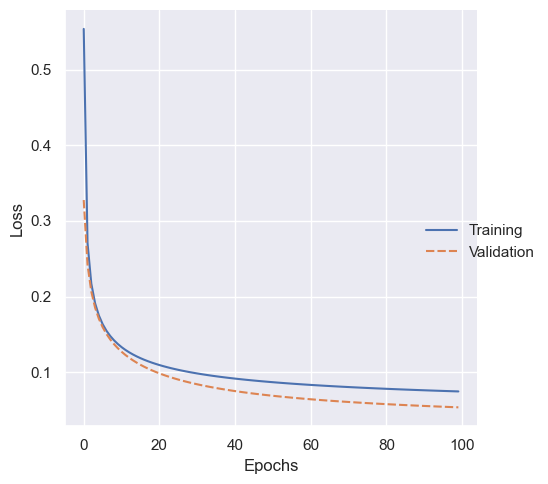

In [219]:
plot: sns.FacetGrid = sns.relplot(data=(history, val_history), kind="line")
plt.xlabel("Epochs")
plt.ylabel("Loss")
new_labels = ['Training', 'Validation']
for texts, labels in zip(plot._legend.texts, new_labels):
    texts.set_text(labels)

After training the model, we assess its performance on unseen test data. Using the `predict` method, we generate predictions for the test set. The `evaluate` method then calculates key metrics—accuracy, precision, recall, and F1 score—which provide a comprehensive measure of the model's generalization ability.

In [217]:
y_pred = model.predict(X_test)
acc, prec, rec, f1 = model.evaluate(y_pred, y_test)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 score:", f1)

Accuracy: 0.986013986013986
Precision: 0.9787234042553191
Recall: 1.0
F1 score: 0.989247311827957


## Conclusion
This notebook demonstrated a fundamental implementation of linear regression from scratch, applied to a widely used benchmark dataset — the California housing dataset. It also provided a detailed explanation of the theory behind linear regression, helping to connect the mathematical foundations with practical implementation.

While the model presented here works well for demonstration purposes, it can be adapted to other datasets as well. However, when doing so, it is important to perform proper exploratory data analysis (EDA) and feature engineering to ensure the model receives meaningful and well-structured input.

Finally, this implementation provides a solid foundation that can be extended further. Techniques such as regularization (e.g., L1/L2 penalties), early stopping, or adaptive learning rates could improve generalization and training efficiency, especially when working with more complex or noisy datasets.

## Conclusion

This notebook presented an implementation of binary logistic regression from scratch, using a benchmark dataset — the breast cancer dataset. The theoretical background was thoroughly explained to bridge the gap between the underlying theory and the practical implementation.

Beware that in a real production scenario, you would need to perform proper exploratory data analysis (EDA) and feature engineering to ensure the model receives clean and informative input. Additionally, further enhancements such as L1/L2 regularization, adaptive learning rates, or early stopping are crucial for improving model performance, generalization, and training efficiency in more demanding settings.


## References

Box, G. E. P., & Draper, N. R. (1987). *Empirical model-building and response surfaces* (p. 424). Wiley. 

Jurafsky, D., & Martin, J. H. (2025). *Speech and language processing* (Draft of January 12, 2025, Chapter 5: Logistic Regression). Retrieved from https://web.stanford.edu/~jurafsky/slp3/5.pdf

Goodfellow, I., Bengio, Y., & Courville, A. (2016). *Deep learning*. MIT Press. Retrieved from https://www.deeplearningbook.org/

Zhang, A., Lipton, Z. C., Li, M., & Smola, A. J. (2022). *Dive into deep learning*. Retrieved from https://d2l.ai/chapter_linear-classification/softmax-regression.html

Ng, A. (2018). *Lecture 3 - Locally Weighted & Logistic Regression* [Video]. YouTube. Stanford CS229: Machine Learning. Retrieved from 
https://www.youtube.com/watch?v=het9HFqo1TQ&list=PLoROMvodv4rMiGQp3WXShtMGgzqpfVfbU&index=3

Ng, A. (2018). *Lecture 4 - Perceptron & Generalized Linear Model* [Video]. YouTube. Stanford CS229: Machine Learning. Retrieved from
https://www.youtube.com/watch?v=iZTeva0WSTQ&list=PLoROMvodv4rMiGQp3WXShtMGgzqpfVfbU&index=4
